In [1]:
#import library 
import pandas as pd
import numpy as np
import os, cv2, shutil
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten,BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from google.colab import files
from keras.preprocessing import image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Definisikan path kaggle json
# Sesuaikan dengan path anda
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/dataset_tugas2"

In [3]:
# Ubah lokasi direktori kerja
# Sesuaikan dengan path anda
%cd /content/drive/My Drive/dataset_tugas2

/content/drive/My Drive/dataset_tugas2


In [4]:
# Cek apakah api sudah terbaca oleh sistem
!ls  

Dataset  kaggle.json  rice_leaf_diseases


In [6]:
!kaggle datasets download -d vbookshelf/rice-leaf-diseases

 87% 32.0M/36.7M [00:01<00:00, 17.5MB/s]
100% 36.7M/36.7M [00:01<00:00, 20.6MB/s]


In [7]:
# Cek isi direktori kerja dan memastikan dataset telah berhasil didownload.
!ls

kaggle.json  rice-leaf-diseases.zip


In [8]:
# Ekstrak file dataset dan hapus file zip dataset agar tidak memakan banyak tempat.
!unzip \*.zip &> /dev/null && rm *.zip

In [16]:
!ls

Dataset  kaggle.json  rice_leaf_diseases


In [ ]:
os.makedirs('/content/drive/My Drive/dataset_tugas2/Dataset')

In [6]:
!pip install split-folders

In [10]:
import splitfolders


base_dir = '/content/drive/MyDrive/dataset_tugas2/rice_leaf_diseases'
data_dir = '/content/drive/My Drive/dataset_tugas2/Dataset'

splitfolders.ratio(base_dir, output=data_dir, seed=1337, ratio=(.8, .19, .01),group_prefix=None)

Copying files: 120 files [00:29,  4.00 files/s]


In [130]:
# TULIS KODE ANDA DISINI
datagen = ImageDataGenerator(rescale=1./255)

In [131]:
input_shape = (224, 224)

train = '/content/drive/MyDrive/dataset_tugas2/Dataset/train'
train_generator = datagen.flow_from_directory(train,
                                              target_size=input_shape,
                                              class_mode='categorical',
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle= True)

validation = '/content/drive/MyDrive/dataset_tugas2/Dataset/val'
validation_generator = datagen.flow_from_directory(validation,
                                              target_size=input_shape,
                                              class_mode='categorical',
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle= True)

test = '/content/drive/MyDrive/dataset_tugas2/Dataset/test'
test_generator = datagen.flow_from_directory(test,
                                              target_size=input_shape,
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle= False)

Found 96 images belonging to 3 classes.
Found 21 images belonging to 3 classes.
Found 3 images belonging to 3 classes.


In [132]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, GlobalMaxPooling2D, BatchNormalization

In [133]:
# Model building
#Instatiating A convnet

model = Sequential()

model.add(InputLayer(input_shape=[224, 224, 3]))
model.add(Conv2D(filters=1, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size = (3,3), strides=2))


model.add(Conv2D(filters=3, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size = (3,3), strides=2))

model.add(Conv2D(filters=1, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size = (3,3), strides=2))
model.add(BatchNormalization())

model.add(Dropout(0.4))
model.add(Flatten())


In [134]:
# Fully Connected Layer
model.add(Dense(1024,activation="softmax"))
model.add(Dense(512,activation="softmax"))
model.add(Dense(3, activation="softmax"))

In [135]:
print(model.summary())

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 224, 224, 1)       28        
                                                                 
 max_pooling2d_62 (MaxPoolin  (None, 111, 111, 1)      0         
 g2D)                                                            
                                                                 
 conv2d_65 (Conv2D)          (None, 111, 111, 3)       30        
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 55, 55, 3)        0         
 g2D)                                                            
                                                                 
 conv2d_66 (Conv2D)          (None, 55, 55, 1)         28        
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 27, 27, 1)      

In [138]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.01), 
              loss='categorical_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [139]:
H = model.fit_generator(train_generator, epochs = 100, validation_data = validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/100
3/3 [==============================] - 6s 2s/step - loss: 0.7935 - acc: 0.6354 - val_loss: 1.2120 - val_acc: 0.4286
Epoch 2/100
3/3 [==============================] - 4s 1s/step - loss: 0.5673 - acc: 0.8125 - val_loss: 1.6097 - val_acc: 0.4762
Epoch 3/100
3/3 [==============================] - 4s 1s/step - loss: 0.4153 - acc: 0.8646 - val_loss: 1.5347 - val_acc: 0.5238
Epoch 4/100
3/3 [==============================] - 4s 1s/step - loss: 0.3478 - acc: 0.8958 - val_loss: 1.5825 - val_acc: 0.4286
Epoch 5/100
3/3 [==============================] - 4s 1s/step - loss: 0.3324 - acc: 0.8854 - val_loss: 1.5358 - val_acc: 0.4286
Epoch 6/100
3/3 [==============================] - 4s 1s/step - loss: 0.3858 - acc: 0.8854 - val_loss: 1.5558 - val_acc: 0.4762
Epoch 7/100
3/3 [==============================] - 4s 1s/step - loss: 0.2899 - acc: 0.9167 - val_loss: 1.2190 - val_acc: 0.5714
Epoch 8/100
3/3 [==============================] - 4s 1s/step - loss: 0.2735 - acc: 0.9271 - val_loss: 1

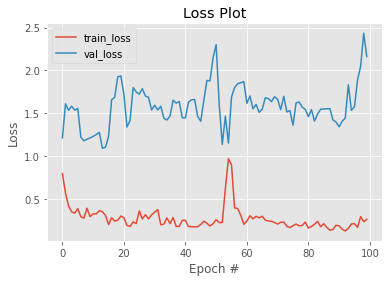

In [140]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()